<a href="https://colab.research.google.com/github/yinghaow525/MSBA-Projects/blob/main/BA890_Research_Project_Yinghao_Wang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## BA890 Research Project - Sales Forecasting for Rossman Stores
####  Yinghao Wang
>**Main Question:**  
Discover the main driving factors that lead to store sales changes from available store, promotion and competitor data. 

>**What methods will you apply to these datasets?**  
Since there are multiple datasets (train and store features), I will first look at the possibility to merge store feature datasets to the training dataset to grab more useful information and predictors for furture use. I will apply data visualizing tools to first generate an intuitive view of data distribution and value counts, and present simple relationship between predictors and factors. Secondly, a data cleaning process is necessary to ensure the data is consistent and usable for model inputs. I will also implement a feature engineering process because there are both categorical, numerical and boolean features. Finally I will use supervised machine learning to fit multiple regression models on the training dataset and predict on the target variable, and finalize outputs with a best-performed model in terms of Mean Absolute Error.

> **What will you produce? For instance, a project proposal could include the following: a report, a PowerPoint presentation, a code notebook (e.g., Google Collab, R Markdown, etc.), a GitHub repository with code.**  
>I will produce with a condense report, Google Collab notebook with GitHub repository. 

>**What are your expected findings?**  
>It is very valuable for the company's market strategy and store management for analysis on sales forecasting. Sales forecast is a process to investigate and study the many factors that affect the changes in market supply and demand, and on this basis, I am expected to generate findings about future development trend of market product supply and demand and changes according to seasonal factors, competitor analysis and promotions. 

## 1. Data Source

### 1.1 Dataset Description

Data Source: Rossman Store Sales. [Dataset Link](https://www.kaggle.com/c/rossmann-store-sales/overview)

This site post 3 available datasets: train, test and store features. Because there is no sales column in the test set, we cannot evaluate model performance with actual y values if we use the test set for train&test split, therefore I will only use train and store features datasets in my research project.




### 1.2 Overview of Dataset 

#### 1.2.1 Train
The train.csv dataset has a total of 1,017,209 data samples (consisting of 9 columns x 1017209 rows of observations) and is the dataset used to train the model. It contains 1115 stores from January 1, 2013 to July 31, 2015, about the daily sales of each store, such as whether it is open on that day, the number of customers on the day, whether to participate in promotions, and the sales on the day , and other information. 




!!!!!Of these, 180 stores lacked data for about half a year from July 1, 2014 to December 31, 2014.

|Attributes          |Definitions|
------------------- |------------------
|Store       | a unique Id for each store|
|DayOfWeek       | the day of week recorded|
|Date      | the date recorded|
|Sales       | the turnover for any given day (this is our target variable) |
|Customers      | the number of customers on a given day |
|Open     | an indicator for whether the store was open: 0 = closed, 1 = open|
|Promo      | indicates whether a store is running a promo on that day |
|StateHoliday   | indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. </br> a = public holiday, b = Easter holiday, c = Christmas, 0 = None |
|SchoolHoliday   | indicates if the (Store, Date) was affected by the closure of public schools |




####  1.2.2 Store
The store.csv dataset has a total of 1115 data samples (consisting of 10 columns x 1115 rows of observations), which contains additional supplementary information corresponding to the 1115 stores, such as store level, store type, and nearby competitor stores, etc. Related Information.

|Attributes          |Definitions|
------------------- |------------------
|Store       | a unique Id for each store|
|StoreType       | differentiates between 4 different store models: a, b, c, d |
|Assortment      | describes an assortment level: a = basic, b = extra, c = extended|
|CompetitionDistance       | distance in meters to the nearest competitor store|
|CompetitionOpenSinceMonth      | gives the approximate month of the time the nearest competitor was opened|
|CompetitionOpenSinceYear     | gives the approximate year of the time the nearest competitor was opened|
|Promo2      | Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating |
|Promo2SinceWeek   | describes the calendar week when the store started participating in Promo2  |
|Promo2SinceYear   | describes the year when the store started participating in Promo2|
|PromoInterval       | describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. </br> E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store |			


## 2. Data Preprocessing

### 2.1 Import Libraries

In [ ]:
# imports
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from scipy.stats.mstats import winsorize

from google.colab import drive

from sklearn.model_selection import train_test_split


from sklearn import ensemble
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error


# supress filter warnings
import warnings
warnings.filterwarnings("ignore")

#plt style
plt.style.use("seaborn")

### 2.2 Import Data

In [ ]:
# mount my google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change directory to the path that contains dataset uploaded
%cd /content/drive/My Drive/BA890

/content/drive/My Drive/BA890


In [ ]:
# list files
!ls

BA890_revised_proposal_YinghaoWang.docx  store.csv  train.csv


In [ ]:
# read datasets
data = pd.read_csv('train.csv')
store = pd.read_csv('store.csv')

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


### 2.3 Merge Data

In [ ]:
data = data.merge(store, on = 'Store', how = 'left')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### 2.3 Missing Value Visualization
There are 172,871 missing value in `Sales` from `train` dataset, and through these null sales values, 54 of them with an open store status (others are all closed at that day).

There are 3 missing values in `CompetitionDistance` from `store` dataset, and 354 missing values in  `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear`, 544 missing values in `Promo2SinceWeek`, `Promo2SinceYear` adn `PromoInterval`. These ptomotion2 related values can be caused by no 2nd promotion held. And the number of these missing values from store dataset increased by times after merging with training on store id match.





<Figure size 720x576 with 0 Axes>

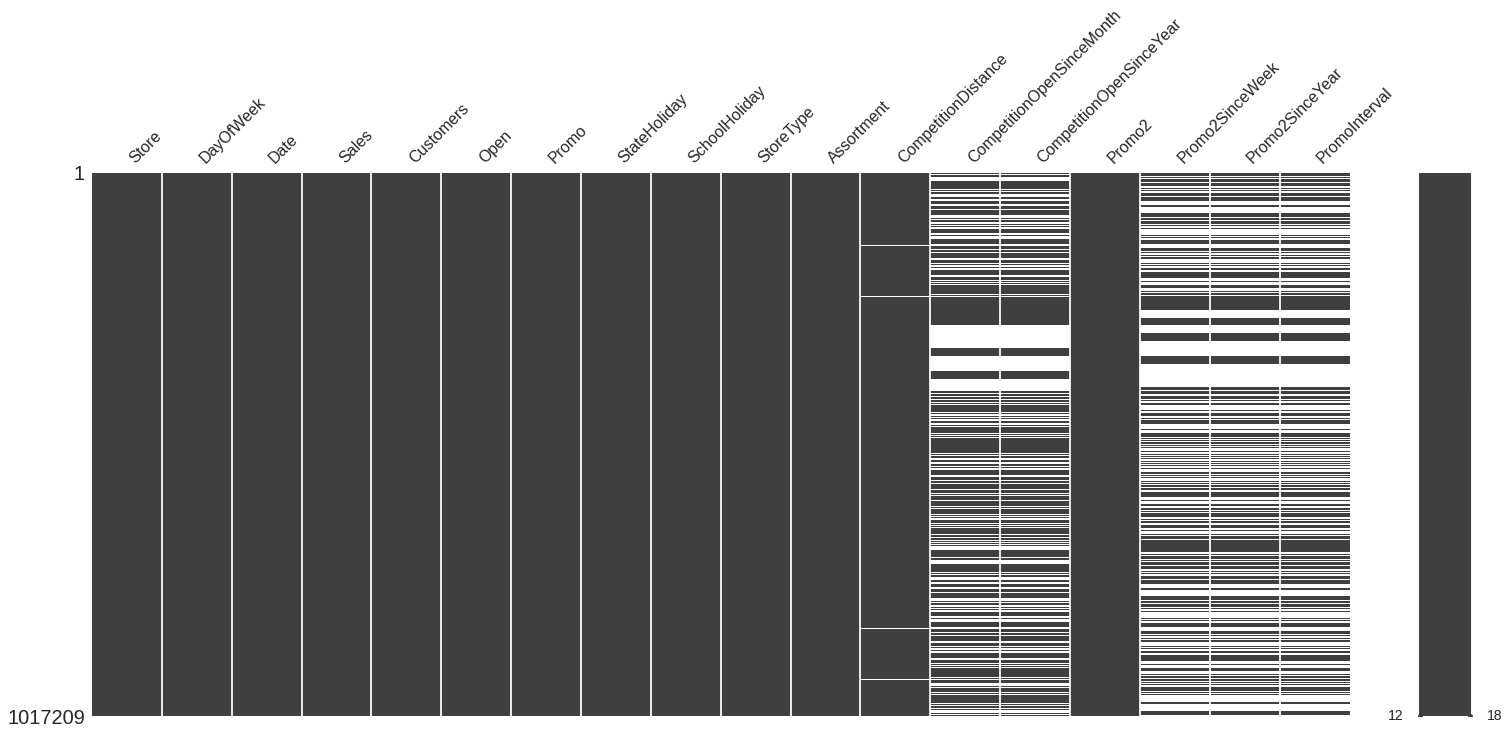

In [ ]:
# visualizing missing value distribution in data 
plt.figure(figsize=(10,8))
msno.matrix(data)
plt.show()

## 3. Exploratory Data Analysis

### Distribution of Store Sales
From the below distribution plot, we can observe that the store sales data is mainly a left-skewed distribution but there are 172,871 observations with store sale value equals to 0 which occupies nearly 10% of total obvservations.

While the other remained sales can be regarded as a normal distribution and roughly concentrated in sale range of 0 ~ 15,000.

To further understand the reason why there are so many 0 sales observation, we count the frequency of store open indicator and visualize the frequency with countplot. Almost all of the zero-sales are caused by a closed store, but there are 54 zero-sales occured when stores are actually open.

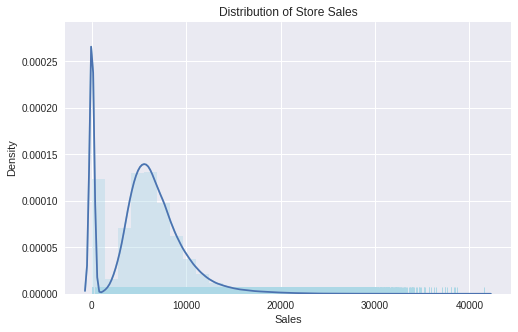

In [ ]:
# check the distribution of store sales
plt.figure(figsize=(8,5))
sns.distplot(data.Sales, color='lightblue', bins=30, rug=True)
sns.distplot(data.Sales, hist=False)
plt.title("Distribution of Store Sales")
plt.show()

In [ ]:
zero_sales = data.loc[data.Sales == 0]
print(zero_sales.info())
print('*'*50)
zero_sales.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172871 entries, 291 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      172871 non-null  int64  
 1   DayOfWeek                  172871 non-null  int64  
 2   Date                       172871 non-null  object 
 3   Sales                      172871 non-null  int64  
 4   Customers                  172871 non-null  int64  
 5   Open                       172871 non-null  int64  
 6   Promo                      172871 non-null  int64  
 7   StateHoliday               172871 non-null  object 
 8   SchoolHoliday              172871 non-null  int64  
 9   StoreType                  172871 non-null  object 
 10  Assortment                 172871 non-null  object 
 11  CompetitionDistance        172415 non-null  float64
 12  CompetitionOpenSinceMonth  118123 non-null  float64
 13  CompetitionOpenSinceYear  

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
291,292,5,2015-07-31,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
875,876,5,2015-07-31,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
1406,292,4,2015-07-30,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN
1990,876,4,2015-07-30,0,0,0,1,0,1,a,a,21790.0,4.0,2005.0,1,18.0,2015.0,"Feb,May,Aug,Nov"
2521,292,3,2015-07-29,0,0,0,1,0,1,a,a,1100.0,6.0,2009.0,0,NaN,NaN,NaN


In [ ]:
# value counts of store open indicators
zero_sales.Open.value_counts()

0    172817
1        54
Name: Open, dtype: int64

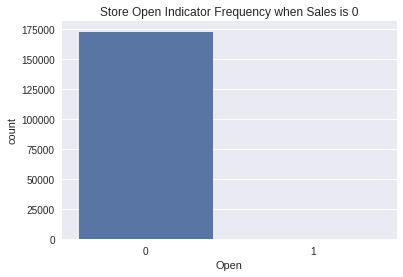

In [ ]:
# count plot
sns.countplot(zero_sales.Open)
plt.title('Store Open Indicator Frequency when Sales is 0')
plt.show()

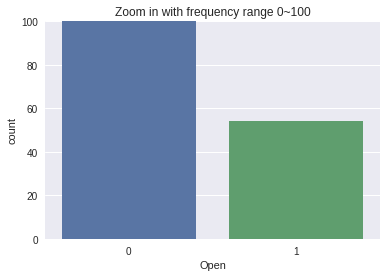

In [ ]:
# zoom in y axis to observe very small portion of open store 0 sales
sns.countplot(zero_sales.Open)
plt.title('Zoom in with frequency range 0~100')
plt.ylim((0,100))
plt.show()

### Store Sales on Different Day of Week

From the chart and plot below, we can observe that store sales reaches the highest on Monday while the lowest on Sunday, with an extreme huge difference as about $7,500. 
Besides, the average sales on weekdays all above 6,000 and relatively stable.

However, we can observe a sudden increase in November and December, which makes sense because these two months contain Thanksgiving and Christmas sales.

In [ ]:
weekofday_sales = data.groupby('DayOfWeek').agg({'Sales':'mean'})
weekofday_sales.reset_index(inplace=True)
weekofday_sales

,DayOfWeek,Sales
0,1,7809.044510
1,2,7005.244467
2,3,6555.884138
3,4,6247.575913
4,5,6723.274305
5,6,5847.562599
6,7,204.183189


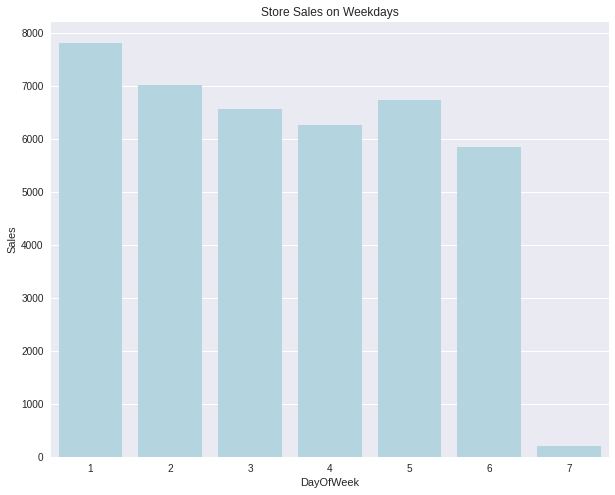

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="DayOfWeek", y="Sales",data=weekofday_sales, color="lightblue")
plt.title('Store Sales on Weekdays')
plt.show()

### Yearly & Monthly Sales

Average yearly sales do not present with a huge difference, they are all about 5700 while 2013's average yearly sales is the lowest.


In [ ]:
# extract year and month from date column
data[["Year", "Month", "Day"]] = data["Date"].str.split("-", expand = True)

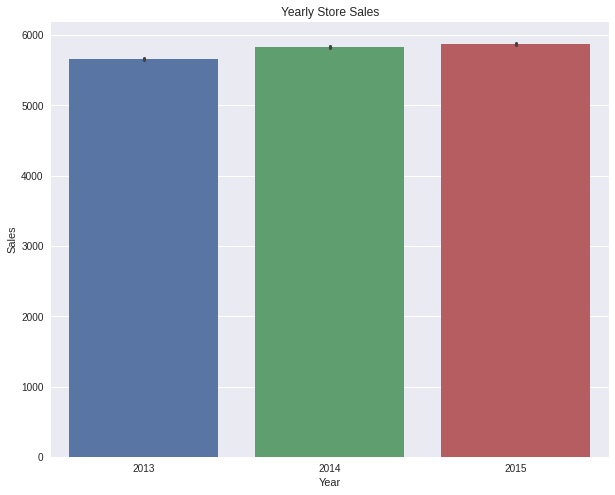

In [ ]:
# Yearly sales
year_order = ['2013','2014','2015']
plt.figure(figsize=(10,8))
sns.barplot(x="Year", y="Sales", data=data, order=year_order)
plt.title('Yearly Store Sales')
plt.show()

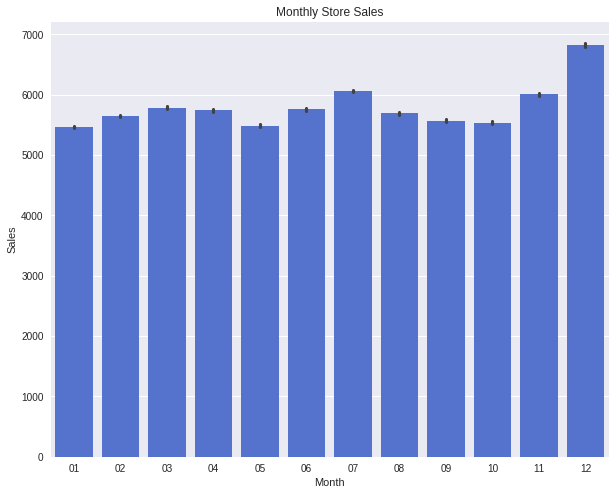

In [ ]:
# Monthly sales

month_order = ["01", "02", "03", "04", "05", "06", "07",
               "08", "09", "10", "11", "12"]
plt.figure(figsize=(10,8))
sns.barplot(x="Month", y="Sales", data=data, color='royalblue', order=month_order)
plt.title('Monthly Store Sales')
plt.show()

In [ ]:
# drop columns
data.drop(columns = ['Year','Month','Day'], inplace=True)
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Impact of Promotion

Use a violin graphic to show the impact on sales of a day of the week with or without a sale. It can be clearly seen that the sales (green) of the store with the promotion are significantly higher than those of the store without the promotion. 

We can also find that on Saturday and Sunday, there are no promotions in the store. Total sales on weekends are much lower than those of weekdays.

In addition, it can be found from the figure that the top of the violin graph is very high, indicating that the datasets has a high outlier interval, and we shoud process with the outliers later.

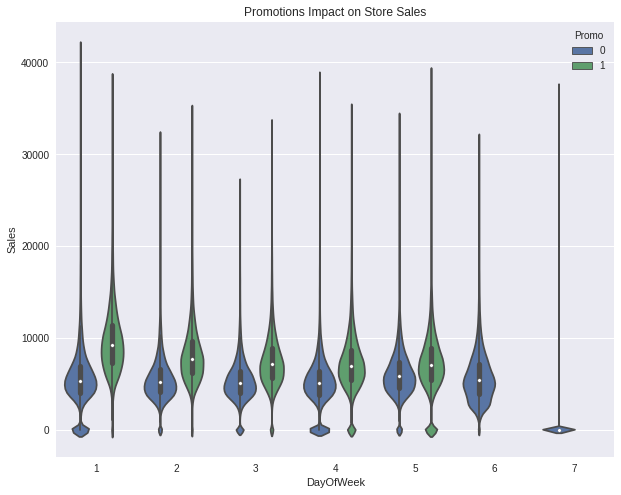

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(x="DayOfWeek", y="Sales", hue="Promo", data=data)
plt.title('Promotions Impact on Store Sales')
plt.show()

### Sales Vary for Each Store

We can observe that sales for most stores are clustered within 2,000 ~ 5,000 range, while there are several stores with extreme high sales: total 38 stores with an sale volume greater than 10,000, among them, store 262 with an average sale as 20,719 reaches the highest sale volume.

In [ ]:
# avg sales volume by stores
data.groupby('Store').agg({'Sales':'mean'}).sort_values('Sales', ascending = False)

,Sales
Store,
262,20718.515924
817,18108.139066
562,17969.556263
1114,17200.196391
251,15814.087049
...,...
841,2461.395966
208,2443.791932
198,2407.933121


In [ ]:
# stat descriptions
data.groupby('Store').agg({'Sales':'mean'}).describe()

,Sales
count,1115.000000
mean,5763.320541
std,2046.447377
min,2244.503185
25%,4412.415567
50%,5459.185775
75%,6633.871550
max,20718.515924


In [ ]:
# number of stores with sale > 10000
data.groupby('Store').agg({'Sales':'mean'}).loc[data.groupby('Store').agg({'Sales':'mean'}).Sales > 10000].shape

(38, 1)

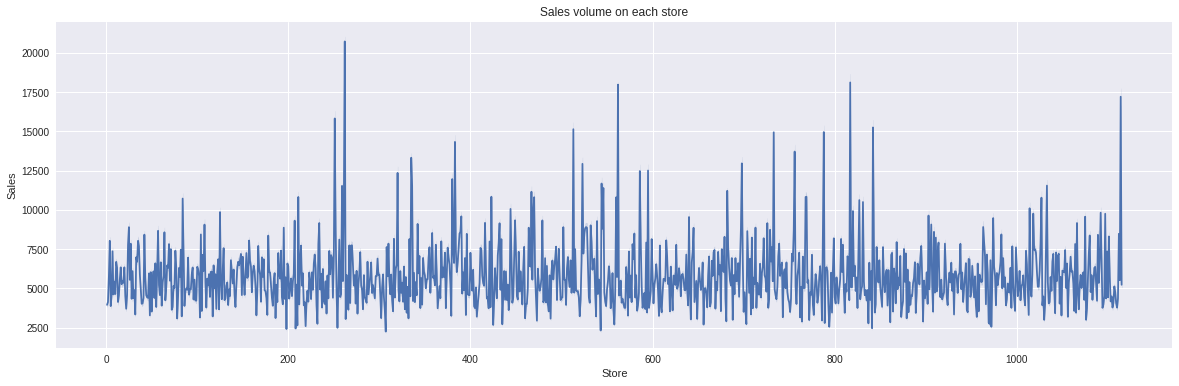

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x=data.Store, y=data.Sales)
plt.title('Sales volume on each store')
plt.show()

### Impact of School and State Holiday

School holiday has no obvious impact on sales, while store sales on stateholiday are much lower than normal days.
However, we detect two "0" values for stateholiday which generate a total of 5 value categories, and we need further data processing to eliminate this.

In [ ]:
# small portion of school holiday
data.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

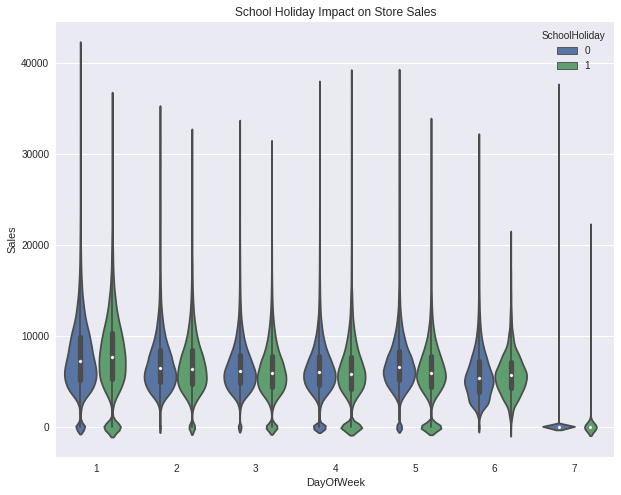

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(x="DayOfWeek", y="Sales", hue="SchoolHoliday", data=data)
plt.title('School Holiday Impact on Store Sales')
plt.show()

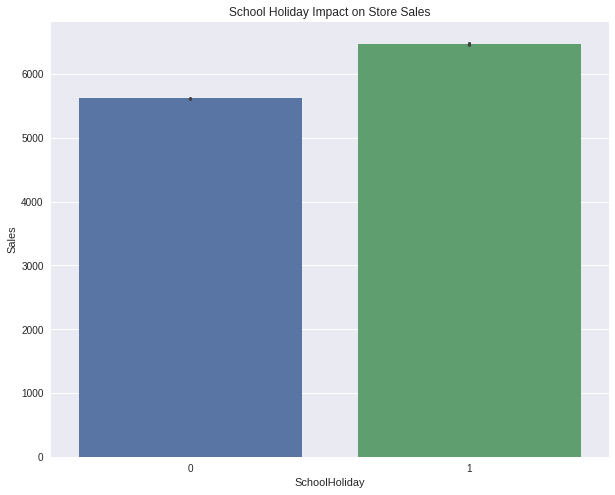

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="SchoolHoliday", y="Sales", data=data)
plt.title('School Holiday Impact on Store Sales')
plt.show()

In [ ]:
# holiday type counts
data.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
data.groupby('StateHoliday').agg({'Sales':'mean'})

,Sales
StateHoliday,
0,5733.530624
0,5980.279717
a,290.735686
b,214.311510
c,168.733171


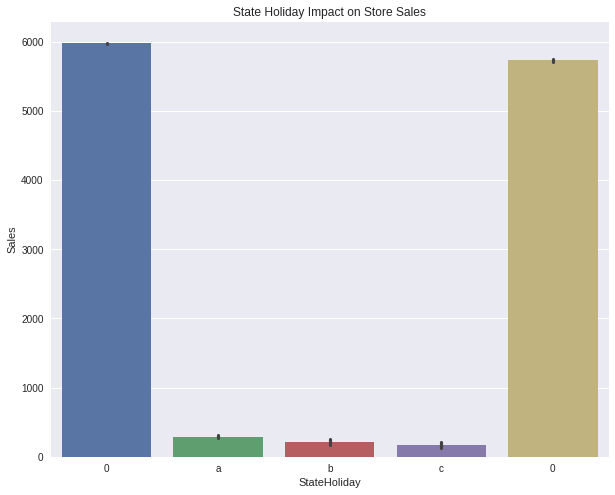

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x="StateHoliday", y="Sales", data=data)
plt.title('State Holiday Impact on Store Sales')
plt.show()

### Customer Volume for Each Store

The customer volumn line is with a similar trend with Sales volume one, stores with extremely high sales also reports with a higher customer volumes.

In [ ]:
data.groupby('Store').agg({'Customers':'mean'})

,Customers
Store,
1,467.646497
2,486.045648
3,620.286624
4,1100.057325
5,444.360934
...,...
1111,373.548832
1112,693.498938
1113,596.763270


In [ ]:
data.groupby('Store').agg({'Customers':'mean'}).describe()

,Customers
count,1115.000000
mean,629.498620
std,318.586404
min,199.132696
25%,449.194268
50%,562.701699
75%,718.176752
max,3403.458599


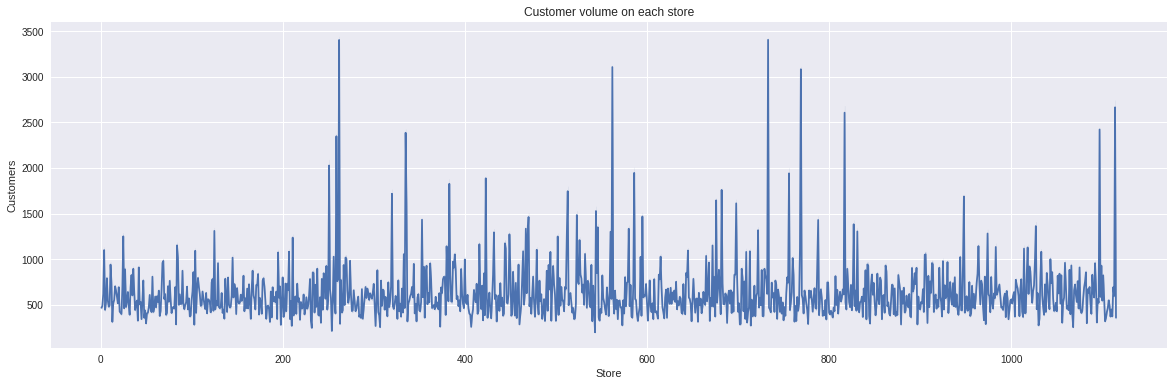

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x=data.Store, y=data.Customers)
plt.title('Customer volume on each store')
plt.show()

### Sales per Customer for Each Store

From the below findings, we can figure out the high sale volume for certain stores has no relationship with per customer spending because as most of the customers spending 8 ~ 10, spending per customer for top 5 sales stores are only about 5 ~ 7.

Thereforem the extreme sales for certain stores seem more correlated with customer volumes which can be a high volume location such as city center.

In [ ]:
sale_per_customer = data.groupby('Store').agg({'Customers':'mean'}).reset_index().merge(data.groupby('Store').agg({'Sales':'mean'}).reset_index(),)

In [ ]:
sale_per_customer['sale_per_customer'] = sale_per_customer.Sales/sale_per_customer.Customers
sale_per_customer.sort_values('Sales', ascending=False)

,Store,Customers,Sales,sale_per_customer
261,262,3402.010616,20718.515924,6.090080
816,817,2605.488323,18108.139066,6.949998
561,562,3105.053079,17969.556263,5.787198
1113,1114,2664.057325,17200.196391,6.456391
250,251,2026.469214,15814.087049,7.803764
...,...,...,...,...
840,841,341.289809,2461.395966,7.212041
207,208,344.121019,2443.791932,7.101548
197,198,280.987261,2407.933121,8.569546
542,543,199.132696,2313.468153,11.617721


In [ ]:
sale_per_customer.sale_per_customer.describe()

count    1115.000000
mean        9.643756
std         1.986858
min         3.513703
25%         8.131856
50%         9.464061
75%        10.981168
max        16.162639
Name: sale_per_customer, dtype: float64

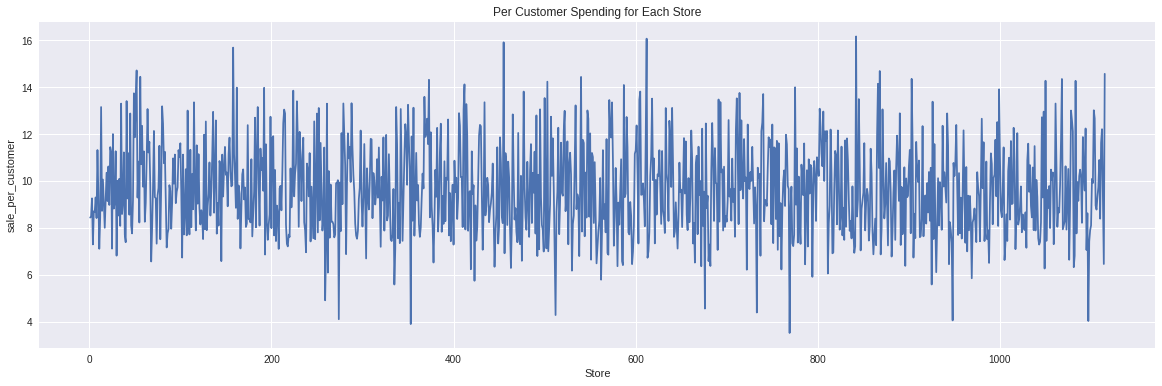

In [ ]:
plt.figure(figsize=(20,6))
sns.lineplot(x=sale_per_customer.Store, y=sale_per_customer.sale_per_customer)
plt.title('Per Customer Spending for Each Store')
plt.show()

### Impact of Competition Distance on Store Sales

From the plot below, we can discover that the sales of Rossman store do not go up with the farther distance the competitors is located. 

While from the size and deepness color of scatter points showed in the plot, for some stores customers and sales volumes are higher when competitor's distance is relatively low.


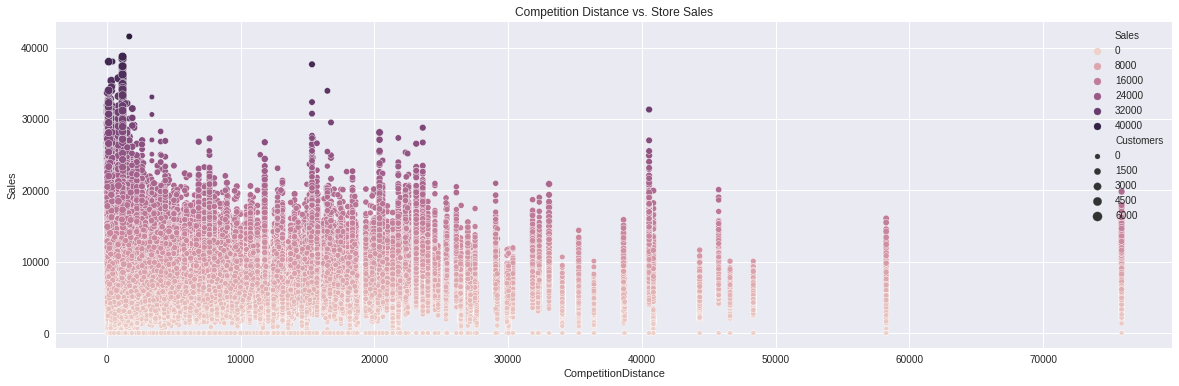

In [ ]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='CompetitionDistance', y='Sales', size='Customers', hue='Sales', 
                data=data)
plt.title('Competition Distance vs. Store Sales')
plt.legend(loc='best')
plt.show()

## 4. Feature Engineering 

#### Missing Value Imputation

In the previous EDA part, we discovered that more than 170,000 observations have a missing value for Sales which is caused because of a closed store status. but there are still 45 stores that are open and the sales are also 0. Kaggle speculates that "this is in some cases due to store remodels, or soft openings that aren't actually open to the public". So for these specific 45 observations with 0 sales, I decided to change the store open status from open to closed (Open = 1 to Open = 0) so that these observations will not effect future model prediction.


I also filled the medians for CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, and Promo2SinceYear respectively.

Because the non-null value portion of `PromoInterval` is only about 5%, and it is string value of month abbreviations that we cannot make any interpretation, I decided to drop this column.

In [ ]:
# data.loc[(data.Sales == 0) & (data.Open == 1)]['Open'] = 0
data["Open"] = np.where(data["Sales"] == 0, 0, 1)
data.fillna(data.median(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
# drop PromoInterval column
data.drop(columns = 'PromoInterval', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

### Check Outliers
We can observe a highly left skewed distribution with extreme large outliers from the boxplot of non-zero sales data, while the quartiles values seem to be acceptable. 

Therefore, I applied a conditionally winsorization to not modify the quartiles value of non-zero sales while also not removing the number of observations; but shrink the range of data at the same time. By setting winsorization level to 5% and 95% level, from the after winsorization box plot we can observe that all the outliers are converged and performs a perfect distribution.

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64
--------------------------------------------------


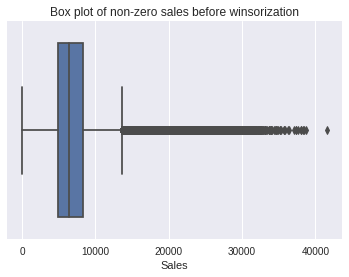

In [ ]:
# check outliers, observe a highly skewed non-zero sales data
print(data[data.Sales != 0].Sales.describe())
print('-'* 50)
sns.boxplot(data[data.Sales != 0].Sales)
plt.title('Box plot of non-zero sales before winsorization')
plt.show()

In [ ]:
# conditionally winsorize at 5% and 95% level
data['Sales'] = np.where(data.Sales == 0, data.Sales, winsorize(data.Sales, (0.05, 0.05)))

count    844338.000000
mean       6771.545656
std        2558.510670
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       12137.000000
Name: Sales, dtype: float64
--------------------------------------------------


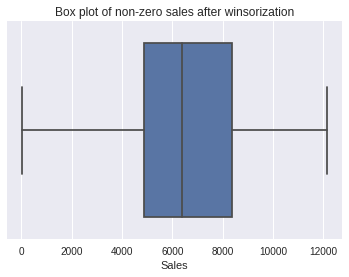

In [ ]:
# after winsorizing:
print(data[data.Sales != 0].Sales.describe())
print('-'* 50)
sns.boxplot(data[data.Sales != 0].Sales)
plt.title('Box plot of non-zero sales after winsorization')
plt.show()

### Split Date Information

In [ ]:
# extract year and month from date column
data[["Year", "Month", "Day"]] = data["Date"].str.split("-", expand = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

### Transfrom `SinceYear` cols to Exact Duration

In [ ]:
# transform "CompetitionOpenSinceYear" to competition open duration
# new column = 2015 - CompetitionOpenSinceYear
data['CompetitionOpenLength'] = 2015 - data.CompetitionOpenSinceYear

In [ ]:
# also transfrom 'Promo2SinceYear' to promo2 duration
data['Promo2Duration'] = 2015 - data.Promo2SinceYear

### Dummy Variables Transformation

In [ ]:
# check whether there are 5 different values in StateHoliday column
print(data.StateHoliday.value_counts())
print('-'*50)
temp = data.StateHoliday.value_counts().reset_index()
# caused because two 0s are different type
print(temp[temp['index']=='0'])
print('-'*50)
print(temp[temp['index']==0])

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64
--------------------------------------------------
  index  StateHoliday
0     0        855087
--------------------------------------------------
  index  StateHoliday
1     0        131072


In [ ]:
# transform int type to string type '0'
data.StateHoliday = np.where(data.StateHoliday == 0, '0',  data.StateHoliday)
data.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
# value counts for storetype
data.StoreType.value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [ ]:
# value counts for assortment
data.Assortment.value_counts()

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [ ]:
# transform above three columns into dummy variables
data = pd.get_dummies(data, columns=['StateHoliday','StoreType','Assortment'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 30 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   SchoolHoliday              1017209 non-null  int64  
 8   CompetitionDistance        1017209 non-null  float64
 9   CompetitionOpenSinceMonth  1017209 non-null  float64
 10  CompetitionOpenSinceYear   1017209 non-null  float64
 11  Promo2                     1017209 non-null  int64  
 12  Promo2SinceWeek            1017209 non-null  float64
 13  Promo2SinceY

### Drop Redundant Columns

In [ ]:
data.drop(columns=['Date', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth',
                   'Promo2SinceYear', 'Promo2SinceWeek'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Store                  1017209 non-null  int64  
 1   DayOfWeek              1017209 non-null  int64  
 2   Sales                  1017209 non-null  int64  
 3   Customers              1017209 non-null  int64  
 4   Open                   1017209 non-null  int64  
 5   Promo                  1017209 non-null  int64  
 6   SchoolHoliday          1017209 non-null  int64  
 7   CompetitionDistance    1017209 non-null  float64
 8   Promo2                 1017209 non-null  int64  
 9   Year                   1017209 non-null  object 
 10  Month                  1017209 non-null  object 
 11  Day                    1017209 non-null  object 
 12  CompetitionOpenLength  1017209 non-null  float64
 13  Promo2Duration         1017209 non-null  float64
 14  StateHoliday_0    

## 5. Correlation Heatmap

From the below correlation heatmap, we can observe that Sales is positively correlated with the following features:
Store, Customers, Store open status, Promotions, SchoolHoliday, Open days without StateHolidays, Storetype_b and extra and extended Assortment types, among which, Customer shows the highest correlation.

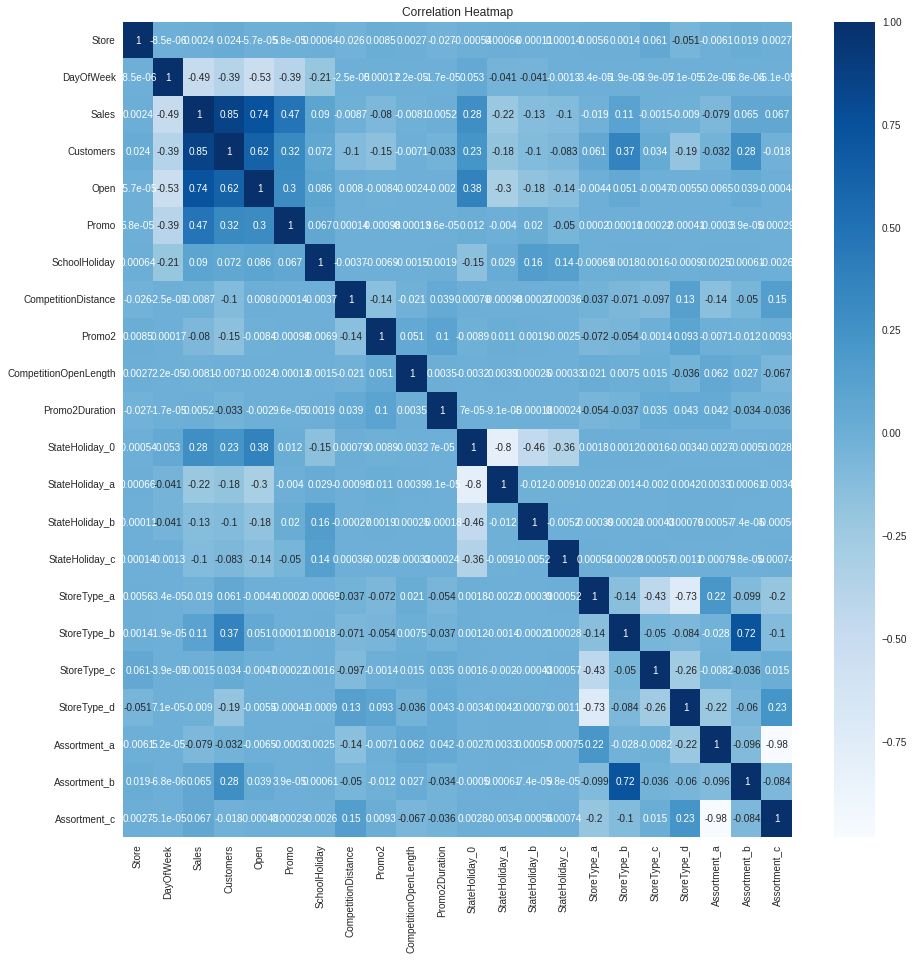

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap='Blues', annot=True)
plt.title('Correlation Heatmap')
plt.show()

## 6. Regression Model

In this part, I will use basic several model from `sklearn` include Linear regression, Decision Tree regression and XGBoost Regression. 

### Split Dataset for Model Inputs (Training & Predicting)

In [ ]:
# split X and y
X = data.drop(columns='Sales')
y = data.Sales

In [ ]:
# train test split on a 70-30 level
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=890)

In [ ]:
print('The number of observations in training set is {}, \nthe number of observations in testing set is {}.'.format(X_train.shape[0], X_test.shape[0]))

The number of observations in training set is 712046, 
the number of observations in testing set is 305163.


### Linear Regression Model

In [ ]:
# Fit Linear Regression Model
lm = LinearRegression().fit(X_train, y_train)

In [ ]:
lm.coef_

array([-8.02658396e-02, -4.67326249e+01,  5.43226009e+00,  2.01692877e+03,
        1.18282211e+03,  4.53553205e+01,  1.65855470e-02,  1.35545712e+02,
        1.39508206e+02,  2.68595066e+01, -1.20412658e-01,  4.06287520e+00,
        5.02237316e+01,  4.15282645e+02, -1.90917188e+02, -3.77661657e+02,
        1.53296199e+02,  5.93188061e+02, -2.50053944e+03,  5.55396966e+02,
        1.35195442e+03,  6.10947768e+02, -1.47121186e+03,  8.60264088e+02])

In [ ]:
# print out coef & feature names
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Store,-0.080266
DayOfWeek,-46.732625
Customers,5.432260
Open,2016.928771
Promo,1182.822110
SchoolHoliday,45.355320
CompetitionDistance,0.016586
Promo2,135.545712
Year,139.508206
Month,26.859507


In [ ]:
# predict
lm_y = lm.predict(X_test)

In [ ]:
# evaluate by mae
lm_mae = mean_absolute_error(y_test, lm_y)
lm_mae

901.8150629118469

### Decision Tree Regression Model

In [ ]:
# Fit regression model
# reg_1 with max_depth = 2
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2)

In [ ]:
# reg_2 with max_depth = 5
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
# Predict
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [ ]:
# evaluate by mae
regr_1_mae = mean_absolute_error(y_test, y_1)
regr_2_mae = mean_absolute_error(y_test, y_2)
print('MAE score of Decision Tree with max_depth = 2 is {},\nMAE score of Decision Tree with max_depth = 5 is {}'.format(regr_1_mae, 
                                                                      regr_2_mae))

MAE score of Decision Tree with max_depth = 2 is 1161.7939521173007,
MAE score of Decision Tree with max_depth = 5 is 781.0356679986988


|--- feature_2 <= 392.50
|   |--- feature_2 <= 184.50
|   |   |--- value: [15.09]
|   |--- feature_2 >  184.50
|   |   |--- value: [3327.68]
|--- feature_2 >  392.50
|   |--- feature_2 <= 810.50
|   |   |--- value: [5883.22]
|   |--- feature_2 >  810.50
|   |   |--- value: [9263.09]



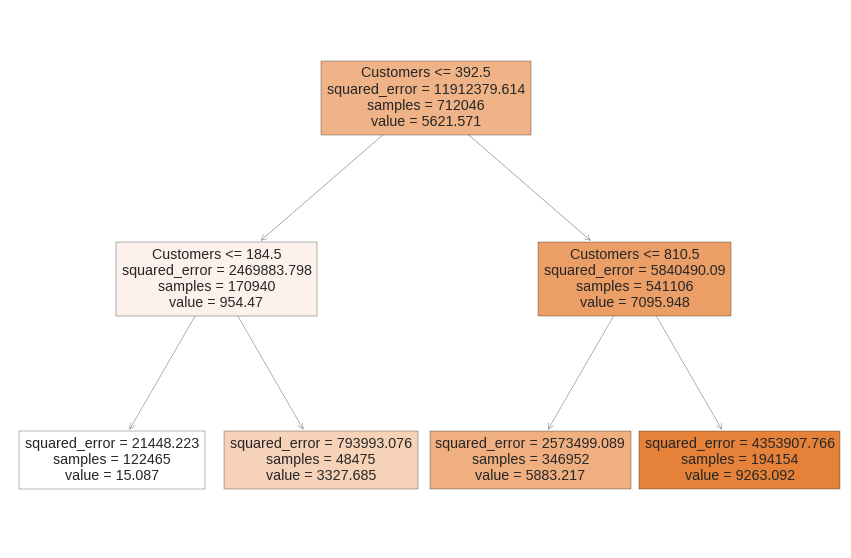

In [ ]:
# visualize decision tree
text_representation_1 = tree.export_text(regr_1)
print(text_representation_1)
# plot 
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(regr_1, feature_names=X_train.columns, filled=True)

|--- feature_2 <= 392.50
|   |--- feature_2 <= 184.50
|   |   |--- feature_2 <= 87.00
|   |   |   |--- feature_2 <= 45.00
|   |   |   |   |--- feature_2 <= 10.50
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_2 >  10.50
|   |   |   |   |   |--- value: [210.00]
|   |   |   |--- feature_2 >  45.00
|   |   |   |   |--- feature_2 <= 60.50
|   |   |   |   |   |--- value: [461.00]
|   |   |   |   |--- feature_2 >  60.50
|   |   |   |   |   |--- value: [630.38]
|   |   |--- feature_2 >  87.00
|   |   |   |--- feature_2 <= 143.50
|   |   |   |   |--- feature_6 <= 310.00
|   |   |   |   |   |--- value: [871.38]
|   |   |   |   |--- feature_6 >  310.00
|   |   |   |   |   |--- value: [1208.35]
|   |   |   |--- feature_2 >  143.50
|   |   |   |   |--- feature_17 <= 0.50
|   |   |   |   |   |--- value: [1671.94]
|   |   |   |   |--- feature_17 >  0.50
|   |   |   |   |   |--- value: [1432.34]
|   |--- feature_2 >  184.50
|   |   |--- feature_2 <= 302.50
|   |   |   |--- featur

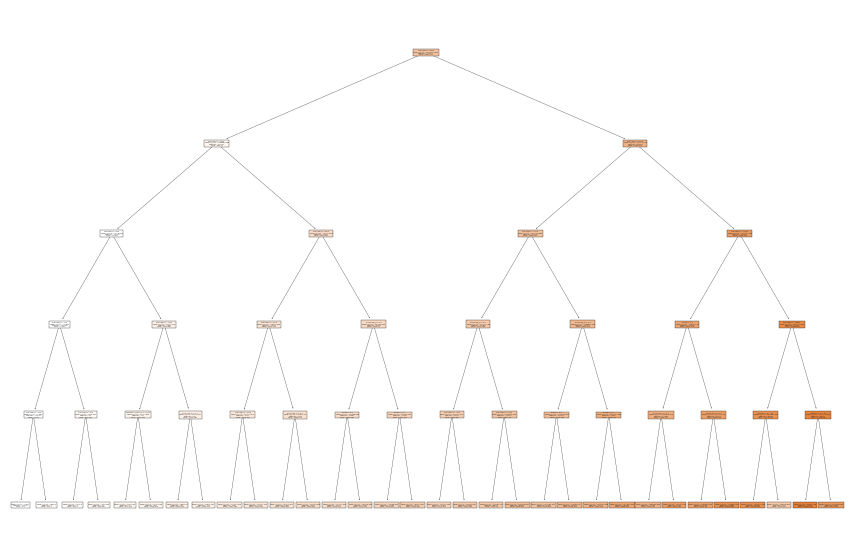

In [ ]:
text_representation_2 = tree.export_text(regr_2)
print(text_representation_2)
# plot 
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(regr_2, feature_names=X_train.columns, filled=True)

### XGBoost Regression Model

In [ ]:
params_1 = {
    # default n_estimators a larger one requires longer fitting time
    "n_estimators": 100,
    "max_depth": 4,
    "min_samples_split": 500,
    # default learning_rate a smaller one requires longer fitting time
    "learning_rate": 0.1,
    "loss": "squared_error",
}

In [ ]:
xgb_1 = ensemble.GradientBoostingRegressor(**params_1)
xgb_1.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, min_samples_split=500)

In [ ]:
# predict
xgb_y_1 = xgb_1.predict(X_test)

In [ ]:
# evaluate
xgb_mae_1 = mean_absolute_error(y_test, xgb_y_1)
print("The mean absolute error (MAE) on test set: {:.4f}".format(xgb_mae_1))

The mean absolute error (MAE) on test set: 549.5957


In [ ]:
feature_importance_xgb_1 = pd.DataFrame({'Feature Names': xgb_1.feature_names_in_,
                                         'Feature Importance': xgb_1.feature_importances_})
feature_importance_xgb_1.sort_values('Feature Importance', ascending = False, inplace=True)
feature_importance_xgb_1

,Feature Names,Feature Importance
2,Customers,0.916179
20,StoreType_d,0.022179
4,Promo,0.021655
6,CompetitionDistance,0.013938
22,Assortment_b,0.004399
1,DayOfWeek,0.003727
12,Promo2Duration,0.003298
0,Store,0.002627
7,Promo2,0.002141
23,Assortment_c,0.002067


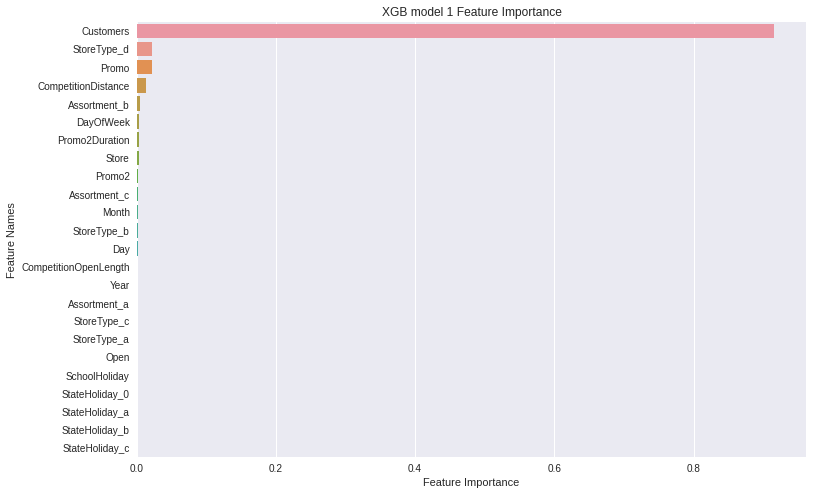

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data = feature_importance_xgb_1, x='Feature Importance', y = 'Feature Names')
plt.title('XGB model 1 Feature Importance')
plt.show()

In [ ]:
params_2 = {
    "n_estimators": 100,
    "max_depth": 10,
    "min_samples_split": 500,
    "min_samples_leaf":6,
    "learning_rate": 0.1,
    "loss": "squared_error",
}

In [ ]:
xgb_2 = ensemble.GradientBoostingRegressor(**params_2)
xgb_2.fit(X_train, y_train)

In [ ]:
# predict
xgb_y_2 = xgb_2.predict(X_test)

In [ ]:
# evaluate
xgb_mae_2 = mean_absolute_error(y_test, xgb_y_2)
print("The mean absolute error (MAE) on test set: {:.4f}".format(xgb_mae_2))

The mean absolute error (MAE) on test set: 301.4249


In [ ]:
feature_importance_xgb_2 = pd.DataFrame({'Feature Names': xgb_2.feature_names_in_,
                                         'Feature Importance': xgb_2.feature_importances_})
feature_importance_xgb_2.sort_values('Feature Importance', ascending = False, inplace=True)
feature_importance_xgb_2['Feature Importance'] = feature_importance_xgb_2['Feature Importance'].apply(lambda x: format(x, '.4f'))
feature_importance_xgb_2

,Feature Names,Feature Importance
2,Customers,0.8872
20,StoreType_d,0.0244
6,CompetitionDistance,0.0231
4,Promo,0.0192
0,Store,0.0140
12,Promo2Duration,0.0056
11,CompetitionOpenLength,0.0053
1,DayOfWeek,0.0042
22,Assortment_b,0.0040
7,Promo2,0.0026


In [ ]:
# back to float type
feature_importance_xgb_2['Feature Importance'] = pd.to_numeric(feature_importance_xgb_2['Feature Importance'].astype('float'))

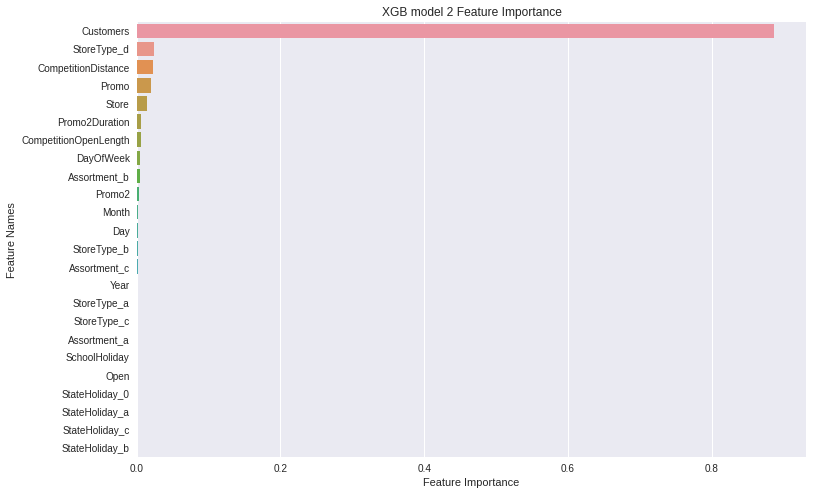

In [ ]:
# plot feature importance 
plt.figure(figsize=(12,8))
sns.barplot(data = feature_importance_xgb_2, x='Feature Importance', y = 'Feature Names')
plt.title('XGB model 2 Feature Importance')
plt.show()

## 7. Conclusions and Recommendations

Above all the models with different initialization settings, XGBoost gives the lowest MAE score in testing set as 301.42, with the following parameters:
- "n_estimators": 100,
- "max_depth": 10,
- "min_samples_split": 500,
- "min_samples_leaf":6,
-"learning_rate": 0.1,
- "loss": "squared_error".

The model gives the features with following importance ranks:
- `Customer` is the highest with over 88% importance given, which makes sense because from the previous EDA part and correlation heatmap we can observe a positive correlation between customer volume and store sales along all observations, 
- Followed by `StoreType_d`, `CompetitionDistance`, `Promo`, `Store`, `Promo2Duration`, `CompetitionOpenLength`, `DayOfWeek`, `Assortment_b`, `Promo2`, `Month`, `StoreType_b`, `Day` and `Assortment_c`. 


----
It can be seen that from these above feature importance, that the level of sale volume is strongly related to customer volume, the type of different stores, the specific date and the open time of when nearby competitors.
Also, we can notice that a short-term promotion is positively correlated and with a higher importance ranking assigned, while Promo2 as a long-term and consecutive promotion does not return such a positive feedback. Therefore, stores should consider give more short-term, pop-up promotions to boost sales instead of the long-term ones that are not good enough to stimulate consumers to purchase more. 

In [ ]:
# model comparison
model_result_mae = pd.DataFrame(columns=['model','mae'])

model_result_mae = model_result_mae.append({
    'model':'Linear Regression',
    'mae': lm_mae}, ignore_index = True)

model_result_mae = model_result_mae.append({
    'model':'Decision Tree max_depth = 2',
    'mae': regr_1_mae,}, ignore_index=True)

model_result_mae = model_result_mae.append({
    'model':'Decision Tree max_depth = 5',
    'mae':regr_2_mae,
  }, ignore_index = True
)

model_result_mae = model_result_mae.append({
   
    'model':'XGBoost  max_depth = 4',
    'mae':xgb_mae_1,
  }, ignore_index = True
)

model_result_mae = model_result_mae.append({

    'model': 'XGBoost max_depth = 10',
    'mae': xgb_mae_2}, ignore_index = True
)

model_result_mae.sort_values('mae', inplace=True)
model_result_mae

,model,mae
4,XGBoost max_depth = 10,301.424888
3,XGBoost max_depth = 4,549.595656
2,Decision Tree max_depth = 5,781.035668
0,Linear Regression,901.815063
1,Decision Tree max_depth = 2,1161.793952


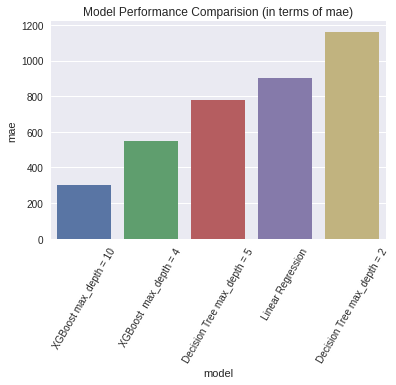

In [ ]:
sns.barplot(x='model', y='mae', data = model_result_mae)
plt.xticks(rotation = 60)
plt.title('Model Performance Comparision (in terms of mae)')
plt.show()